In [1]:
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12

np.set_printoptions(precision=4, suppress=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(12, 4))

## Time Series: Datetime object

In [3]:
from datetime import datetime
sample_date = datetime(2012,12,20,1,30,24,43)
sample_date

datetime.datetime(2012, 12, 20, 1, 30, 24, 43)

In [5]:
datetime(2008,8,8)

datetime.datetime(2008, 8, 8, 0, 0)

In [7]:
print("YEAR :  {} \n".format(sample_date.year)) 
print("MONTH : {} \n".format(sample_date.month))
print("DAY : {} \n".format(sample_date.day))
print("HOUR : {} \n".format(sample_date.hour))
print("MINUTE : {} \n".format(sample_date.minute))
print("SECOND : {} \n".format(sample_date.second))
print("MICROSECOND : {} \n".format(sample_date.microsecond))

YEAR :  2012 

MONTH : 12 

DAY : 20 

HOUR : 1 

MINUTE : 30 

SECOND : 24 

MICROSECOND : 43 



In [8]:
delta = sample_date - datetime(1995, 2, 20)
delta

datetime.timedelta(days=6513, seconds=5424, microseconds=43)

In [9]:
delta.days

6513

In [10]:
delta.seconds

5424

In [12]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start - timedelta(12)

datetime.datetime(2010, 12, 26, 0, 0)

**String and datetime object**

In [13]:
stamp = datetime(2011, 1, 3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [18]:
stamp.strftime('%Y/%m/%d')

'2011/01/03'

In [20]:
value = '2011-01-03'
print(type(value))
a = datetime.strptime(value, '%Y-%m-%d')
print(a)

<class 'str'>
2011-01-03 00:00:00


In [21]:
datetime.strptime("2001-01-10 12:10:08", "%Y-%m-%d %S:%M:%I")

datetime.datetime(2001, 1, 10, 8, 10, 12)

In [22]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [23]:
datestrs

['7/6/2011', '8/6/2011']

In [24]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

## Plot with Matplotlib
Matplotlib is a desktop plotting pacakge designed for creating publication-quality plots. 

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### Two Interfaces:
Matplotlib has dual interfaces: a convenient MATLAB-style satate-based interface, and a more powerful object-oriented interface

#### MATLAB-style interface
Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact. The MATLAB-style tools are contained in the pyplot(plt) interface. For example, the following code will probably look quite familiar to MATLAB users:

AxesSubplot(0.125,0.536818;0.775x0.343182)
Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.343182)
Figure(432x288)


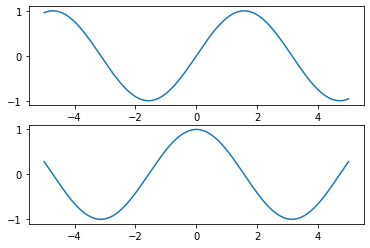

In [28]:
plt.figure() # create a plot figure
x = np.linspace(-5,5,1000)
# create the first of two panels and set current axis
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))
print(plt.gca())
print(plt.gcf())

# create the second panel and set current axis
plt.subplot(2,1,2)
plt.plot(x, np.cos(x))
print(plt.gca())
print(plt.gcf())

It's important to note that this interface is stateful: it keeps track of the "current" figure and axes, which are where all plt commands are applied. You can get a reference to these using the plt.gcf() (get current figure) and plt.gca(get current axes) routines

While this stateful interface is fast and convenient for simple plots, it is easy to run
into problems. For example, once the second panel is created, how can we go back
and add something to the first? This is possible within the MATLAB-style interface,
but a bit clunky. Fortunately, there is a better way.

#### Object-oriented interface
The object-oriented interface is available for these more complicated situations, and
for when you want more control over your figure. Rather than depending on some
notion of an “active” figure or axes, in the object-oriented interface the plotting func‐
tions are methods of explicit Figure and Axes objects. To re-create the previous plot
using this style of plotting, you might do the following 

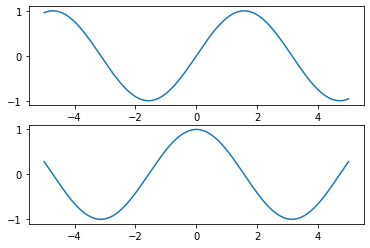

In [30]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))


For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated. In most cases, the difference is as small as switching plt.plot() to ax.plot(), but there are a few gotchas that we will highlight.

In [32]:
mpl.style.use('seaborn-whitegrid')

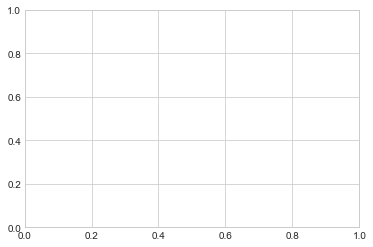

In [33]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the figure(an instance of the class plt.Figure) can be thought of as a single container that contains all the objects representing axes, graphics, text and labels. The axes(an instance of the class plt.Axes) is what we see above: a bounding box with ticks and labels, which will enventually contain the plot elements that make up our visualization. We usually use fig to refer to a figure instance, and ax/axe to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the ax.plot function to plot some data. 

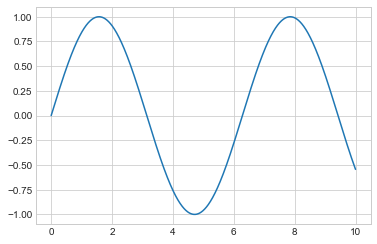

In [34]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0,10, 1000)
ax.plot(x, np.sin(x))

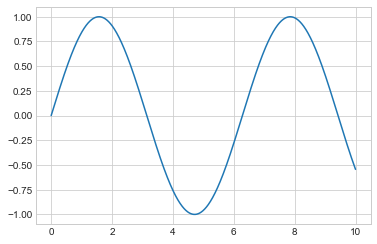

In [35]:
plt.plot(x, np.sin(x))


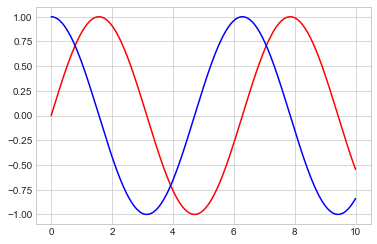

In [36]:
plt.plot(x, np.sin(x), 'red')
plt.plot(x, np.cos(x), 'blue')

#### Adjusting line colors and styles

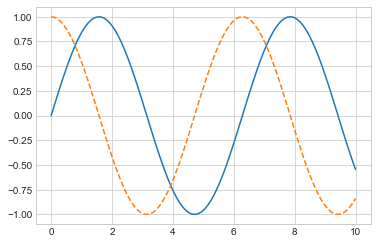

In [39]:
# Linestyle
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

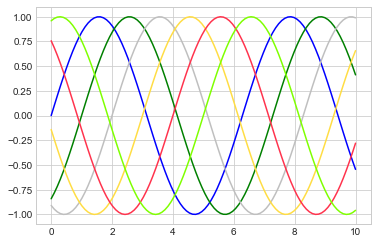

In [41]:
plt.plot(x, np.sin(x - 0), color = 'blue') ## color by name
plt.plot(x, np.sin(x - 1), color = 'g')    ## short color code RGB(Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/Black)
plt.plot(x, np.sin(x - 2), color = '0.75') ## Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color = '#FFDD44') ## Hex code
plt.plot(x, np.sin(x - 4), color = (1.0, 0.2, 0.3)) ## RGB tuple, values 0 and 1
plt.plot(x, np.sin(x - 5), color = 'chartreuse') ## All HTML color names

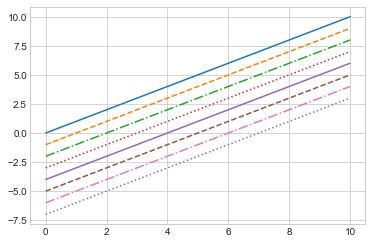

In [42]:
plt.plot(x, x - 0, linestyle = 'solid') 
plt.plot(x, x - 1, linestyle  = 'dashed')    
plt.plot(x, x - 2, linestyle  = 'dashdot') 
plt.plot(x, x - 3, linestyle  = 'dotted') 

plt.plot(x, x - 4, linestyle  = '-') 
plt.plot(x, x - 5, linestyle  = '--') 
plt.plot(x, x - 6, linestyle  = '-.') 
plt.plot(x, x - 7, linestyle  = ':') 

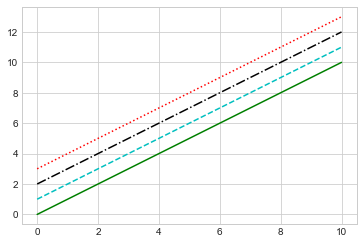

In [43]:
plt.plot(x, x + 0, '-g') # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r'); # dotted red

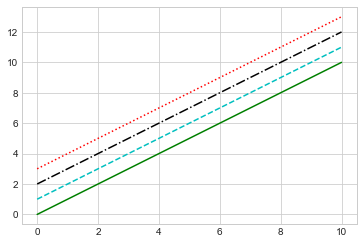

In [44]:
plt.plot(x, x + 0, 'g-') # solid green
plt.plot(x, x + 1, 'c--') # dashed cyan
plt.plot(x, x + 2, 'k-.') # dashdot black
plt.plot(x, x + 3, 'r:'); # dotted red

#### Adjusting the Plot: Axes Limits
Matplotlib does a decent job of choosing default axes limits for your plot, but some‐
times it’s nice to have finer control. The most basic way to adjust axis limits is to use the plt.xlim() and plt.ylim() 

(-1.5, 1.5)

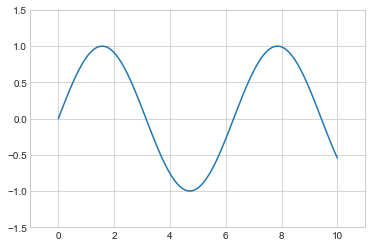

In [47]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments.

(1.2, -1.2)

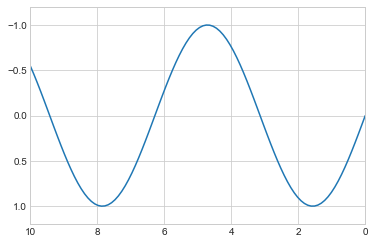

In [49]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2)

A useful related method is plt.axis(). The plt.axis() method allows you to set the x and y limits with a single call.

[-1, 11, -1.5, 1.5]

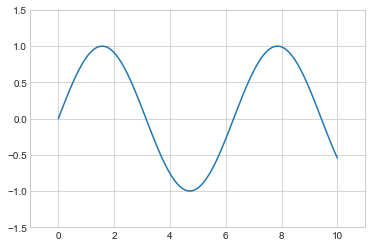

In [50]:
plt.plot(x, np.sin(x))

plt.axis([-1, 11, -1.5, 1.5])

(-0.5, 10.5, -1.0993384025373631, 1.0996461858110391)

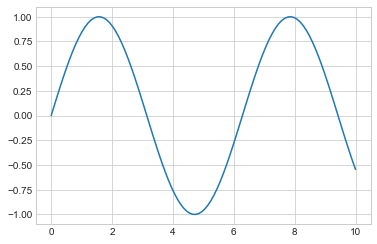

In [51]:
plt.plot(x, np.sin(x))

plt.axis('tight')

(-0.5, 10.5, -1.0993384025373631, 1.0996461858110391)

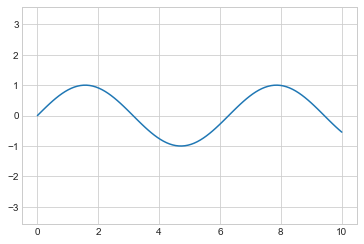

In [52]:
plt.plot(x, np.sin(x))

plt.axis('equal')

#### Labeling Plots

Text(0, 0.5, 'Sin(x)')

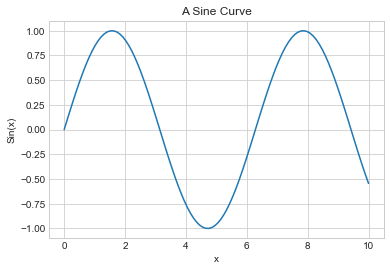

In [53]:
plt.plot(x, np.sin(x))
plt.title('A Sine Curve')
plt.xlabel('x')
plt.ylabel('Sin(x)')

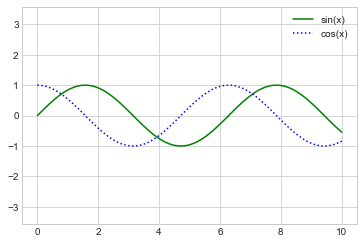

In [54]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend();

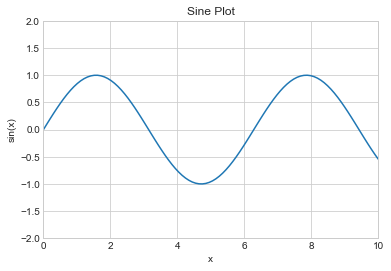

In [56]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='sin(x)', title='Sine Plot');

Text(0.5, 0, 'x')

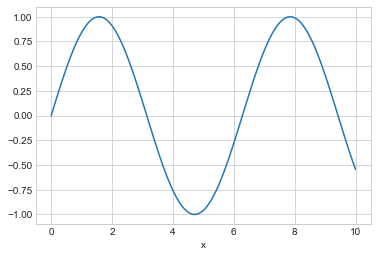

In [57]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set_xlabel('x')

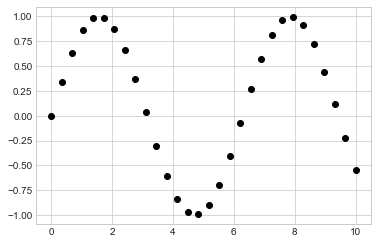

In [68]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

(0, 1.8)

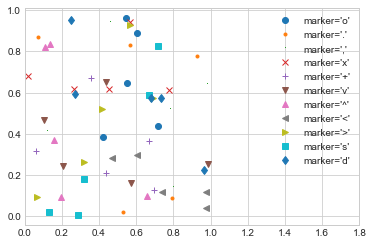

In [60]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
    label="marker='{0}'".format(marker))

plt.legend(numpoints = 1)
plt.xlim(0, 1.8)

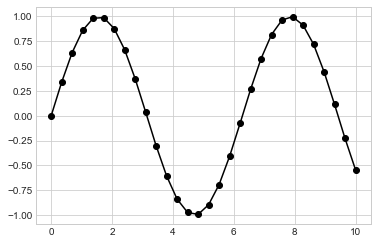

In [62]:
plt.plot(x, y, '-ok')

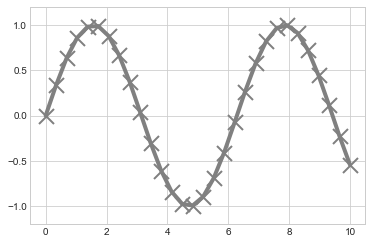

In [65]:
plt.plot(x, y, '-x', color='gray',
        markersize=15, linewidth=4,
        markerfacecolor='white',
        markeredgecolor='gray',
        markeredgewidth=2)

plt.ylim(-1.2, 1.2);

Another more powerful method of creating scatter plots is the plt.scatter function, which can be used very similarly to the plt.plot function

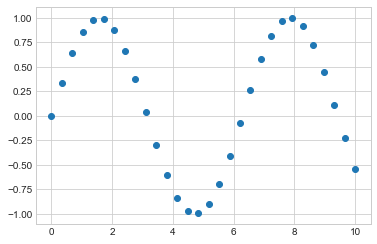

In [69]:
plt.scatter(x, y, marker = 'o')

The primary difference of plt.scatter from plt.plot is that it can be used to create
scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

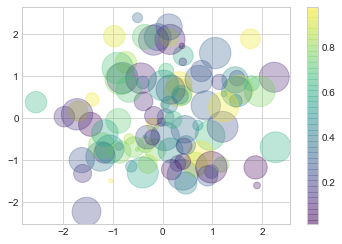

In [70]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(); 

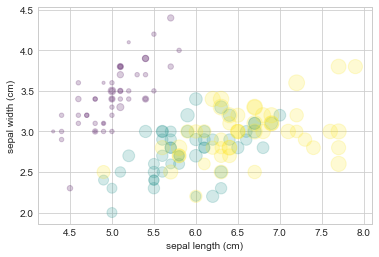

In [71]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.2,
s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);